In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import numpy as np
import random

In [2]:
df = pd.read_csv( os.path.join('csv_label', 'tsflesh_filter.csv') )
df=df[df['day']<=2]
df

,"0__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","0__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0","0__change_quantiles__f_agg_""var""__isabs_False__qh_0.4__ql_0.0","0__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.0","0__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","0__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0","0__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0",0__approximate_entropy__m_2__r_0.5,0__approximate_entropy__m_2__r_0.7,0__cid_ce__normalize_False,original,label,day
0,0.132243,0.091106,0.087755,0.052986,0.068347,0.118409,0.237931,0.419051,0.362927,2.437212,56.0,0,0
1,0.124600,0.079630,0.071400,0.051803,0.067789,0.115943,0.225000,0.450099,0.337871,2.414539,55.5,0,0
2,0.127666,0.082469,0.074958,0.050429,0.065619,0.117068,0.233333,0.463397,0.348506,2.433105,55.8,0,0
3,0.128116,0.085067,0.072469,0.050429,0.064018,0.117068,0.226667,0.492925,0.347816,2.433105,56.2,0,0
4,0.128430,0.083876,0.071136,0.050079,0.061831,0.115885,0.220690,0.483991,0.345046,2.418677,56.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151401,0.892681,1.073841,1.171636,0.355094,0.111122,0.727855,0.775862,0.302643,0.179674,6.021628,53.6,0,2
1151402,0.884134,1.064328,1.162222,0.358467,0.111122,0.720816,0.758621,0.336226,0.180011,5.984146,53.8,0,2
1151403,0.897809,1.084590,1.206667,0.358367,0.111122,0.730012,0.765517,0.344838,0.212945,6.004165,53.1,0,2
1151404,0.896479,1.082687,1.202747,0.360258,0.111122,0.729088,0.762069,0.349499,0.249397,6.001666,53.0,0,2


In [4]:
train=df[(df['label']==0)&(df['day']==0)][df.columns[:-3]].values
test=df[(df['day']!=0)][df.columns[:-3]].values
train

array([[0.13224271, 0.09110583, 0.0877551 , ..., 0.41905111, 0.36292743,
        2.43721152],
       [0.1246    , 0.0796301 , 0.0714    , ..., 0.45009918, 0.33787098,
        2.41453929],
       [0.12766601, 0.08246914, 0.07495845, ..., 0.46339683, 0.34850554,
        2.43310501],
       ...,
       [0.43113741, 0.41793103, 0.28228374, ..., 0.13646141, 0.06262108,
        5.05173238],
       [0.43165023, 0.41793103, 0.28228374, ..., 0.13686931, 0.06372636,
        5.05173238],
       [0.43291256, 0.41793103, 0.28228374, ..., 0.1613212 , 0.073646  ,
        5.06359556]])

In [5]:
nk = 1
neigh = NearestNeighbors(n_neighbors=nk)
neigh.fit(train)
d = neigh.kneighbors(test)[0]
d = np.mean(d, axis=1)
mx = np.max(d)
d = d / mx

In [7]:
window=50
test_for_plot=df[(df['day']!=0)]['original'].values[window-1:]
test_for_plot

array([44.1, 44.7, 44.2, ..., 53.1, 53. , 51.6])

In [11]:
label=df[(df['day']!=0)][df.columns[-2]].values[window-1:]*100
label_index=range(len(label))
label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

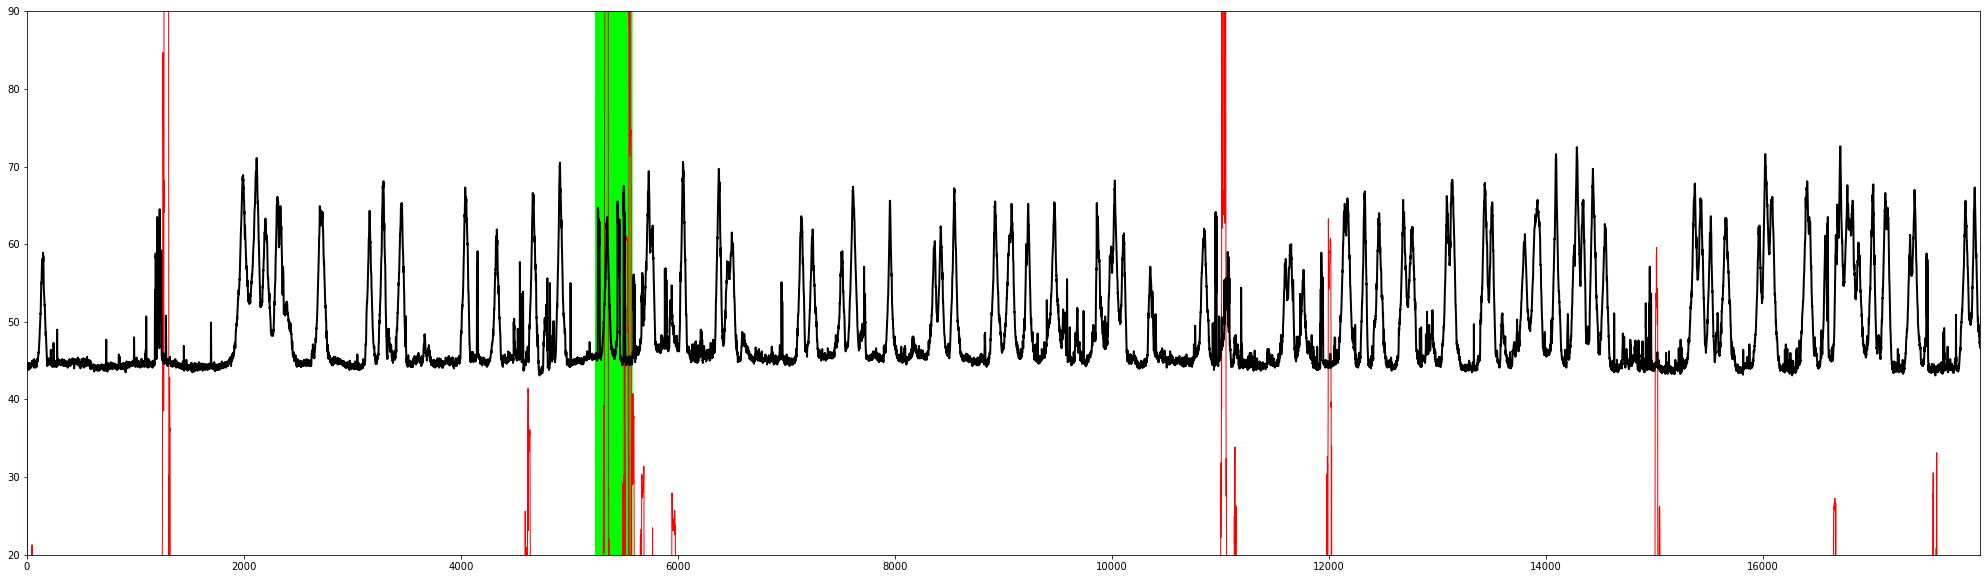

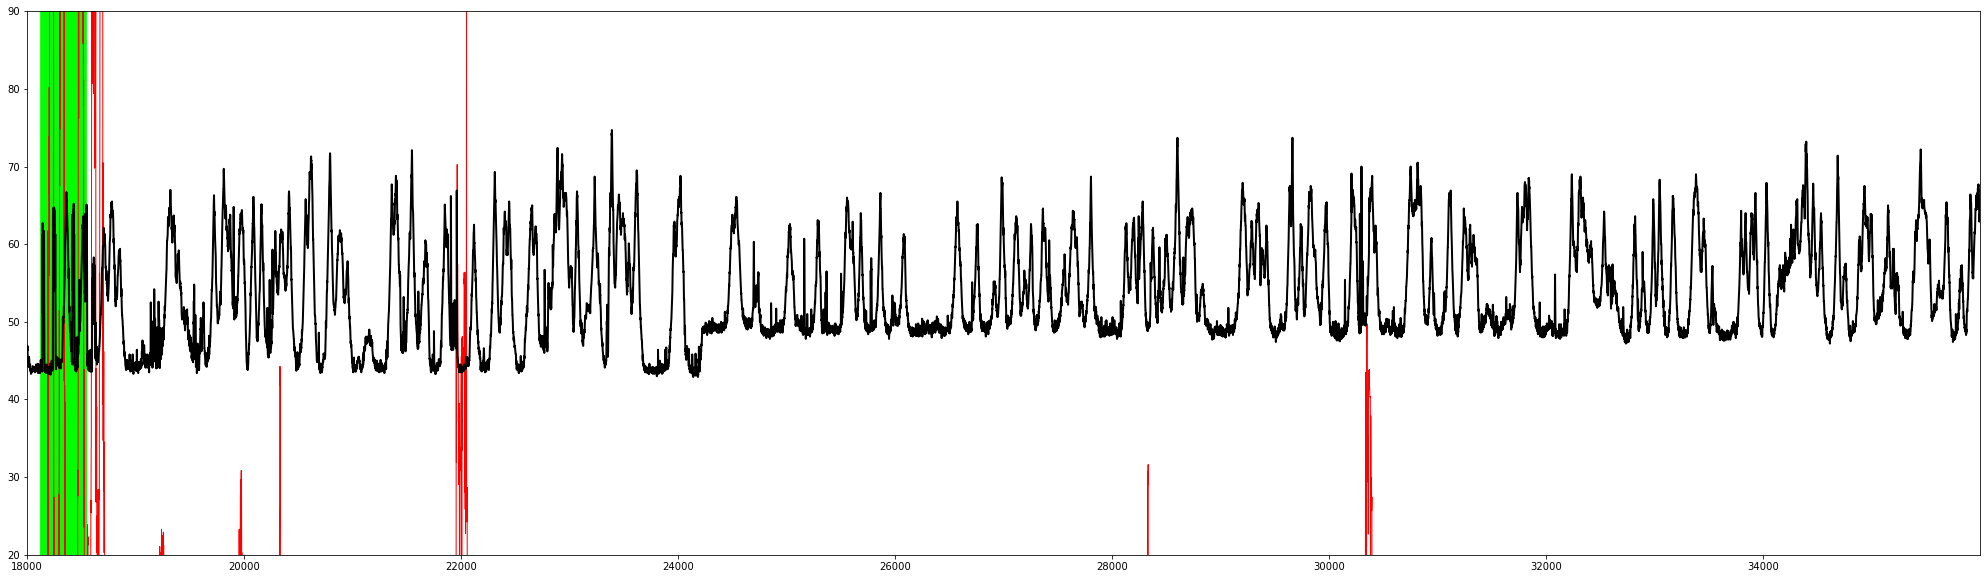

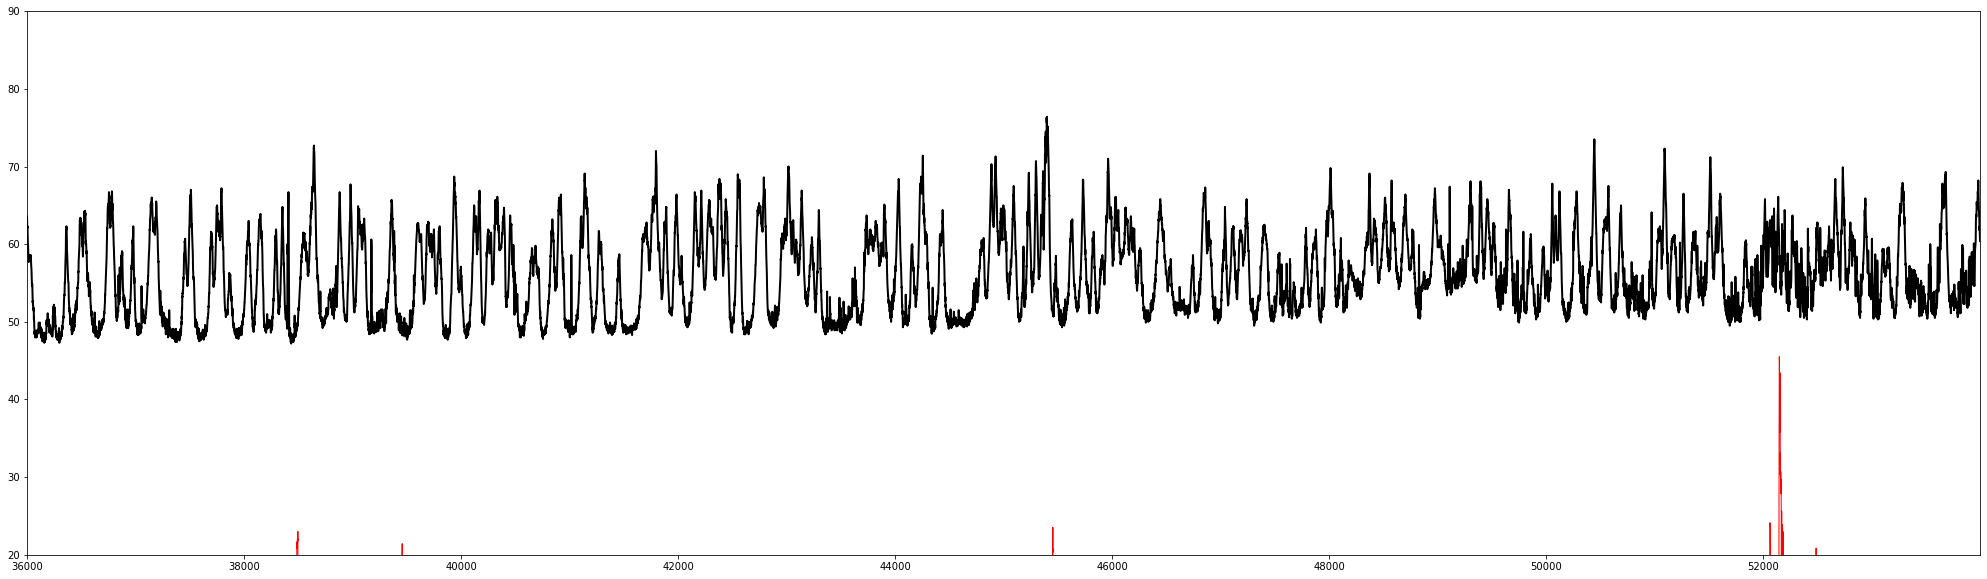

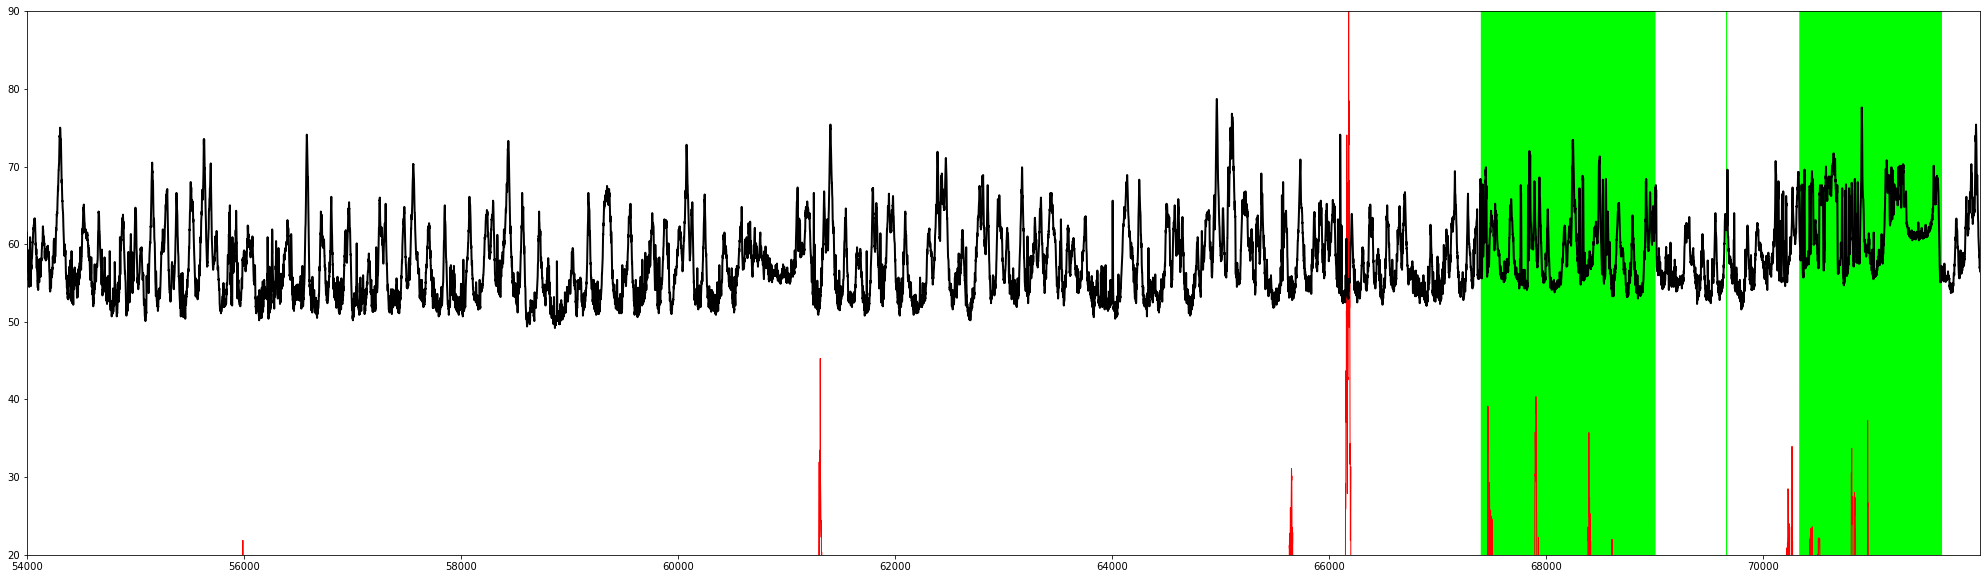

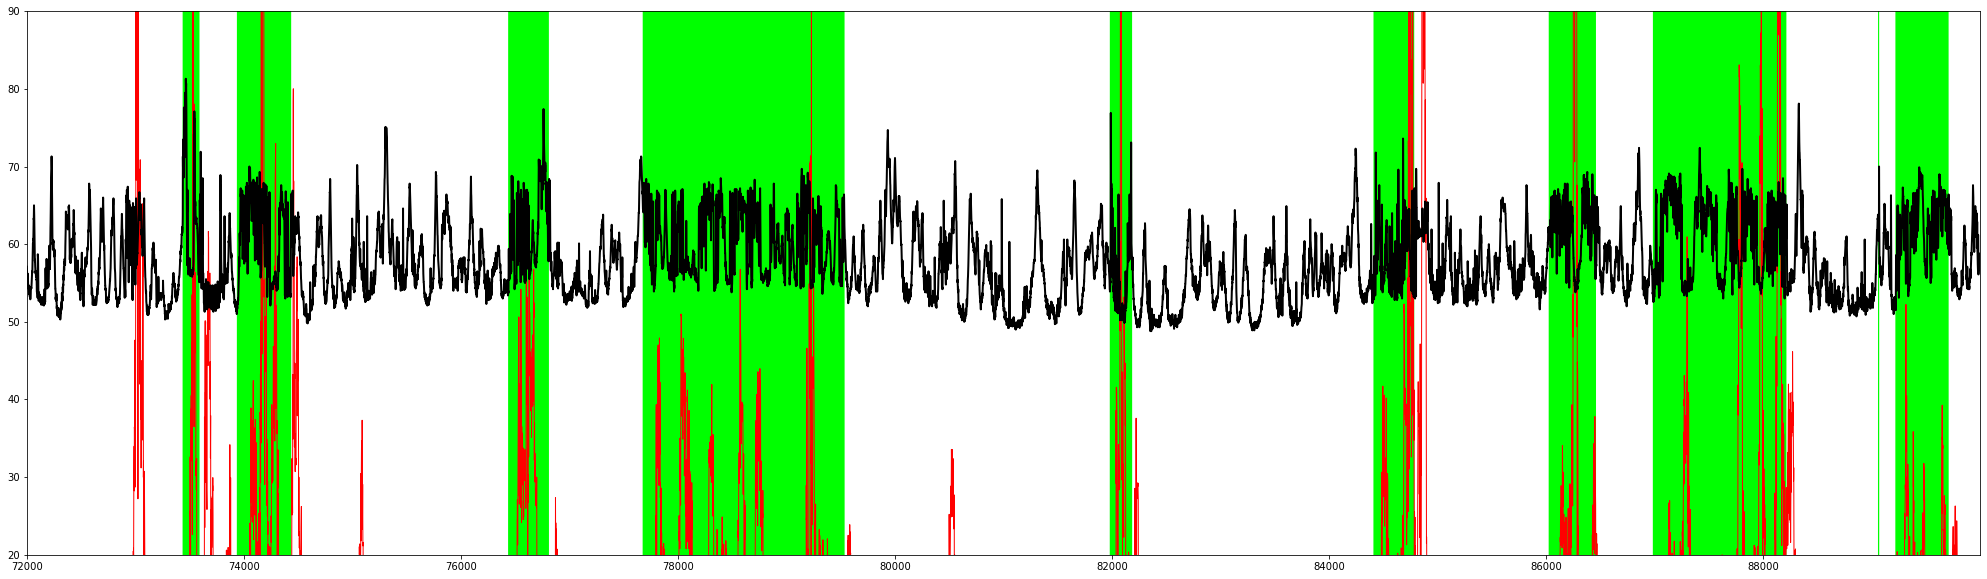

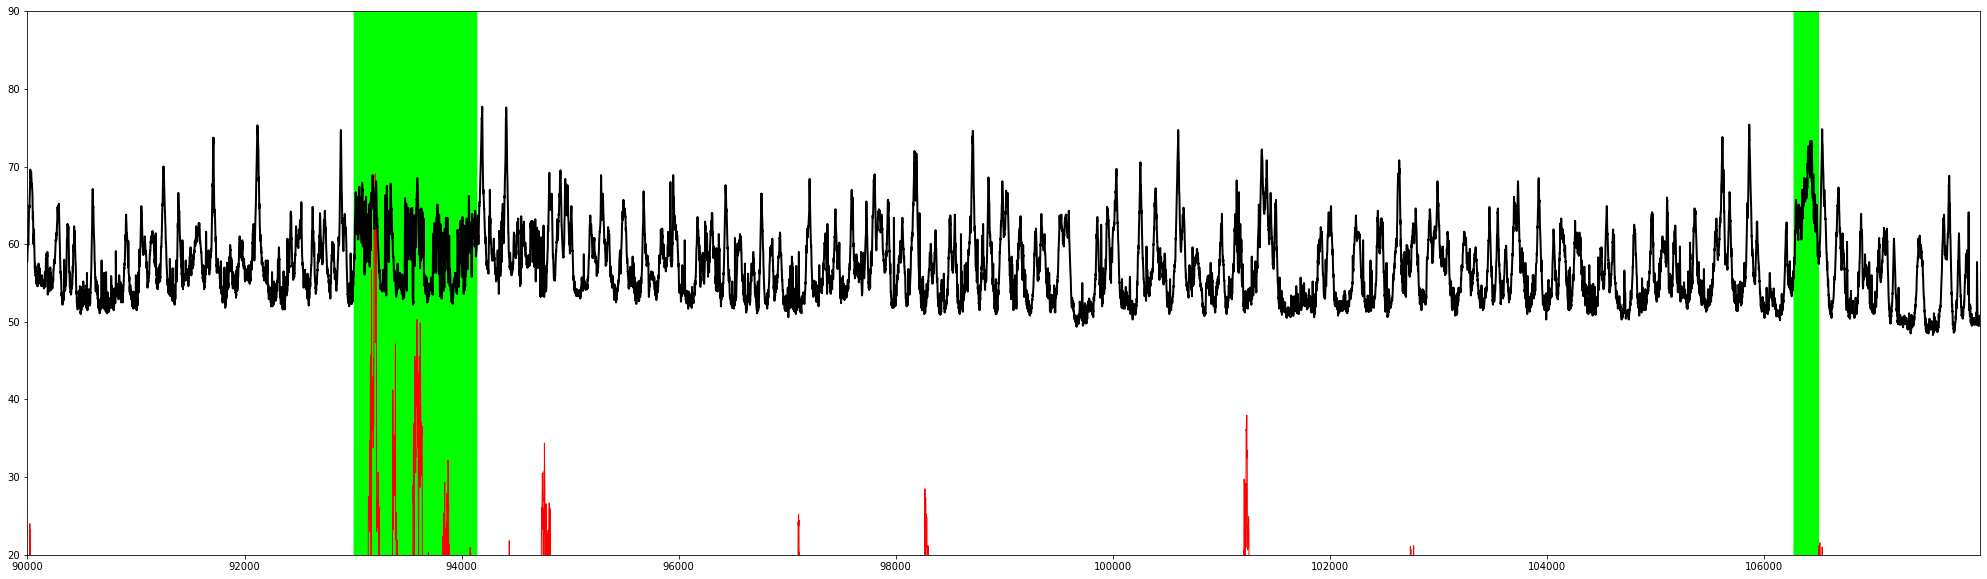

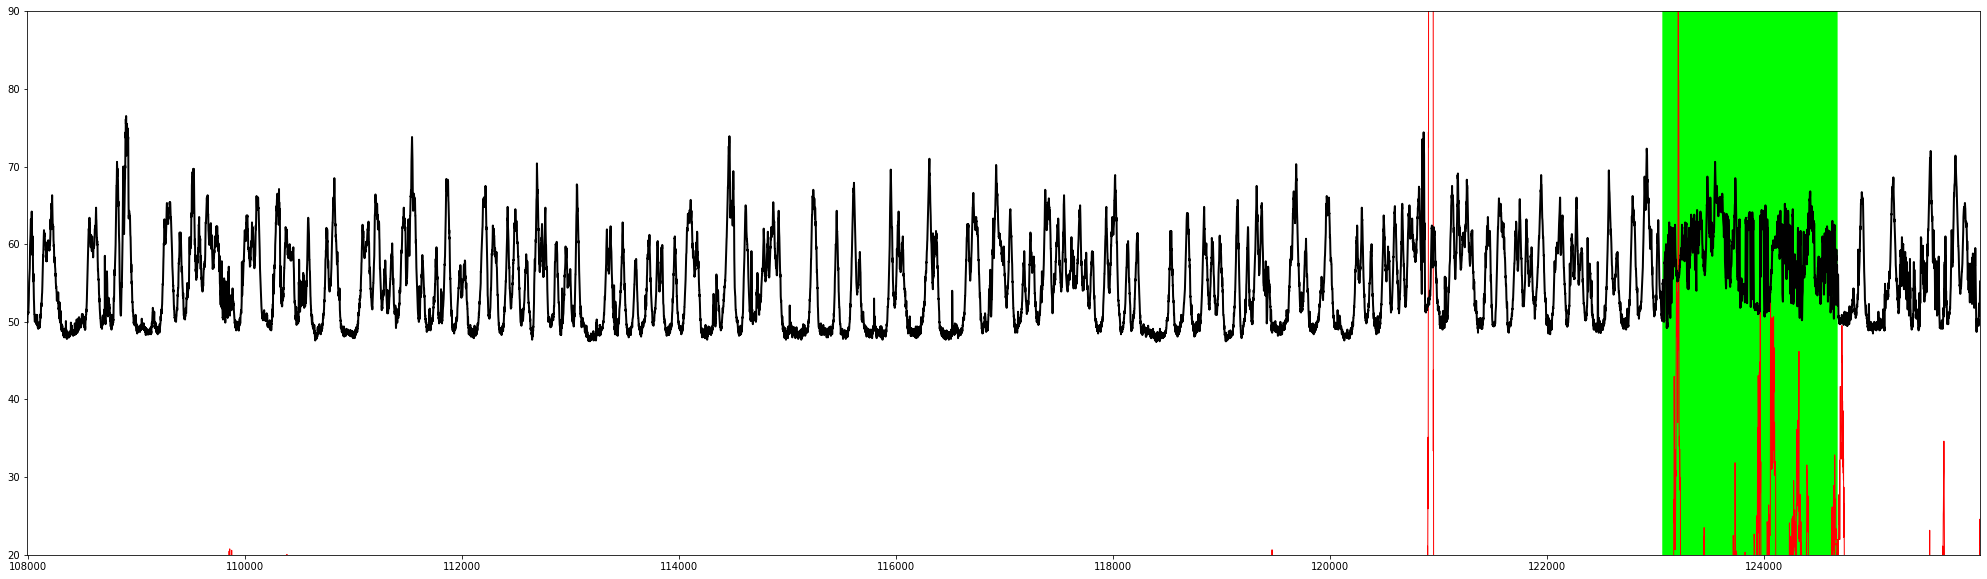

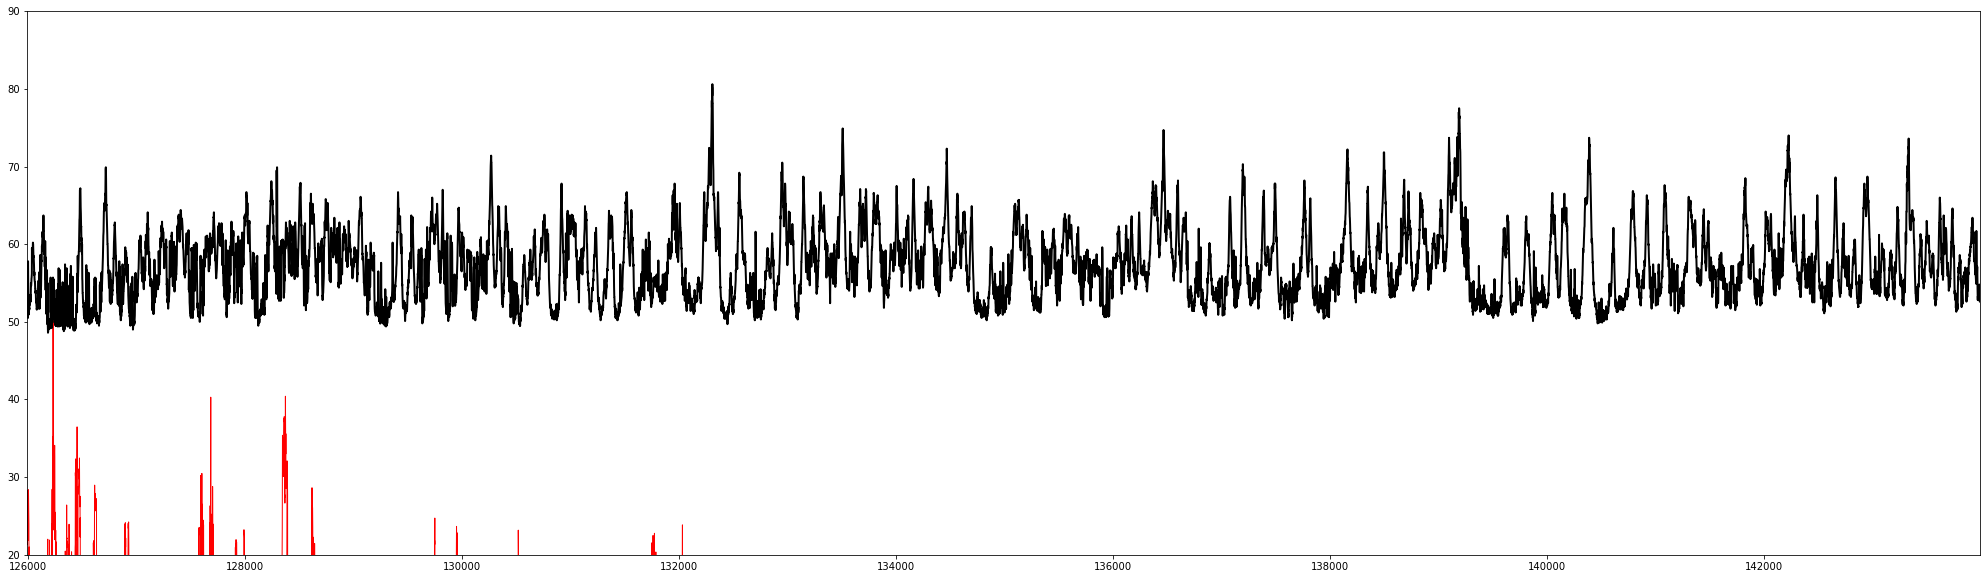

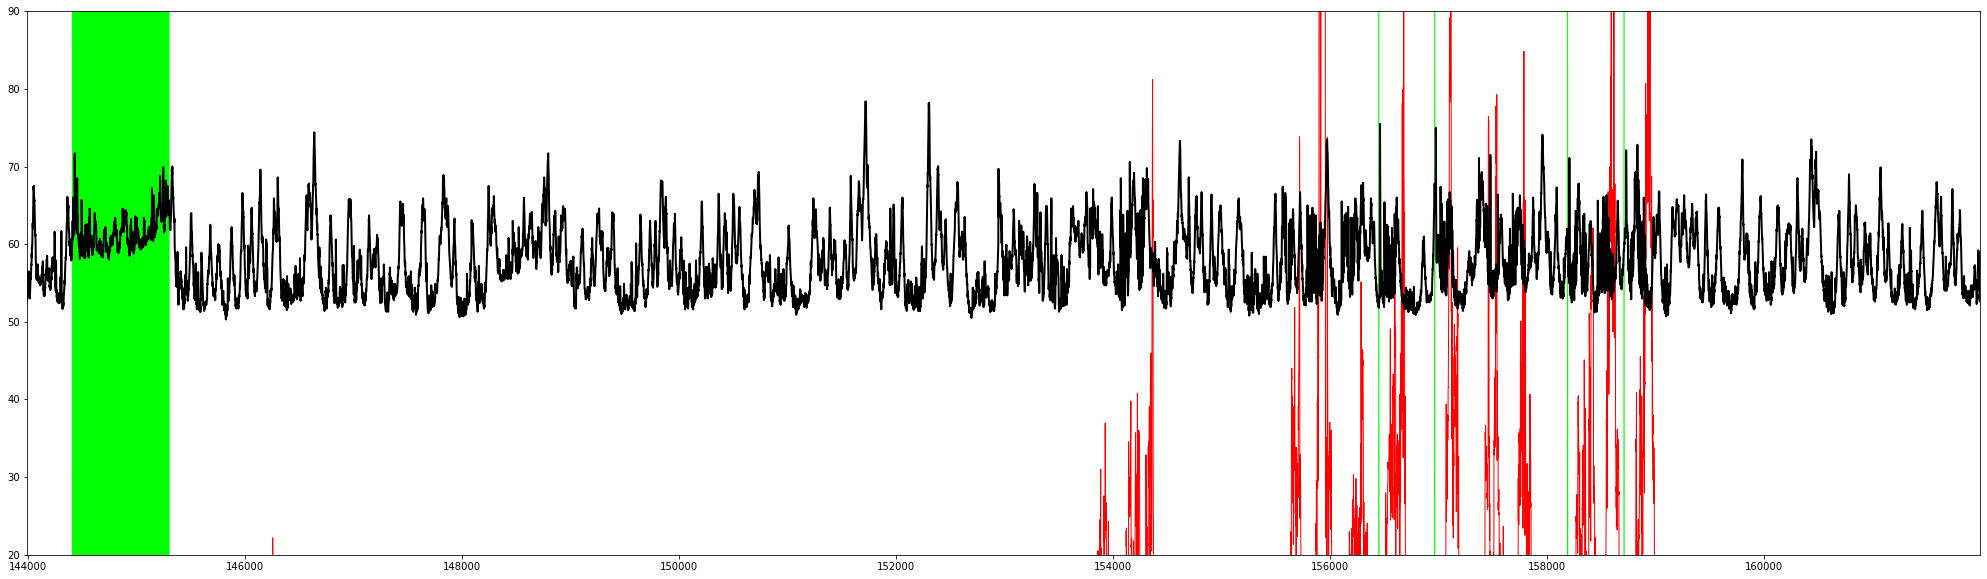

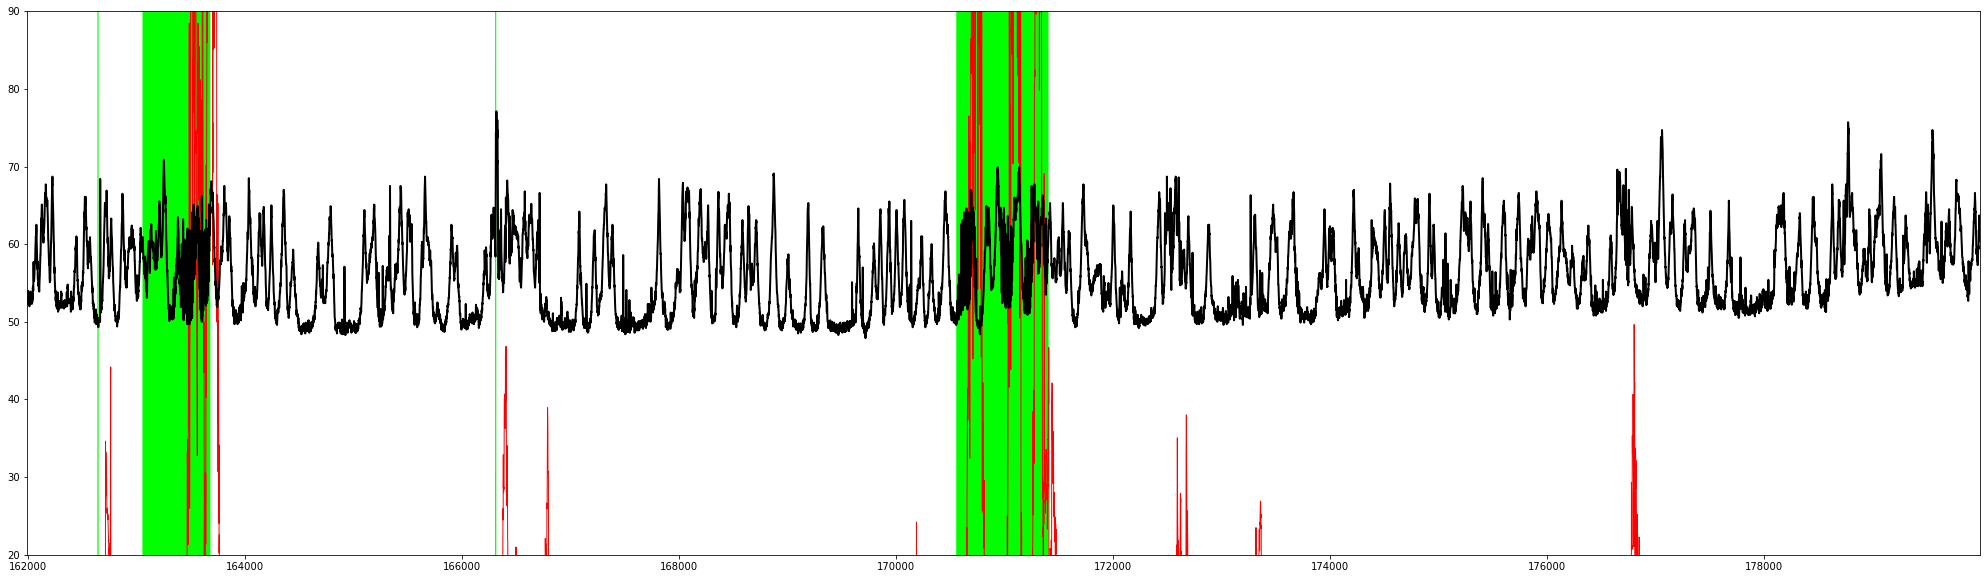

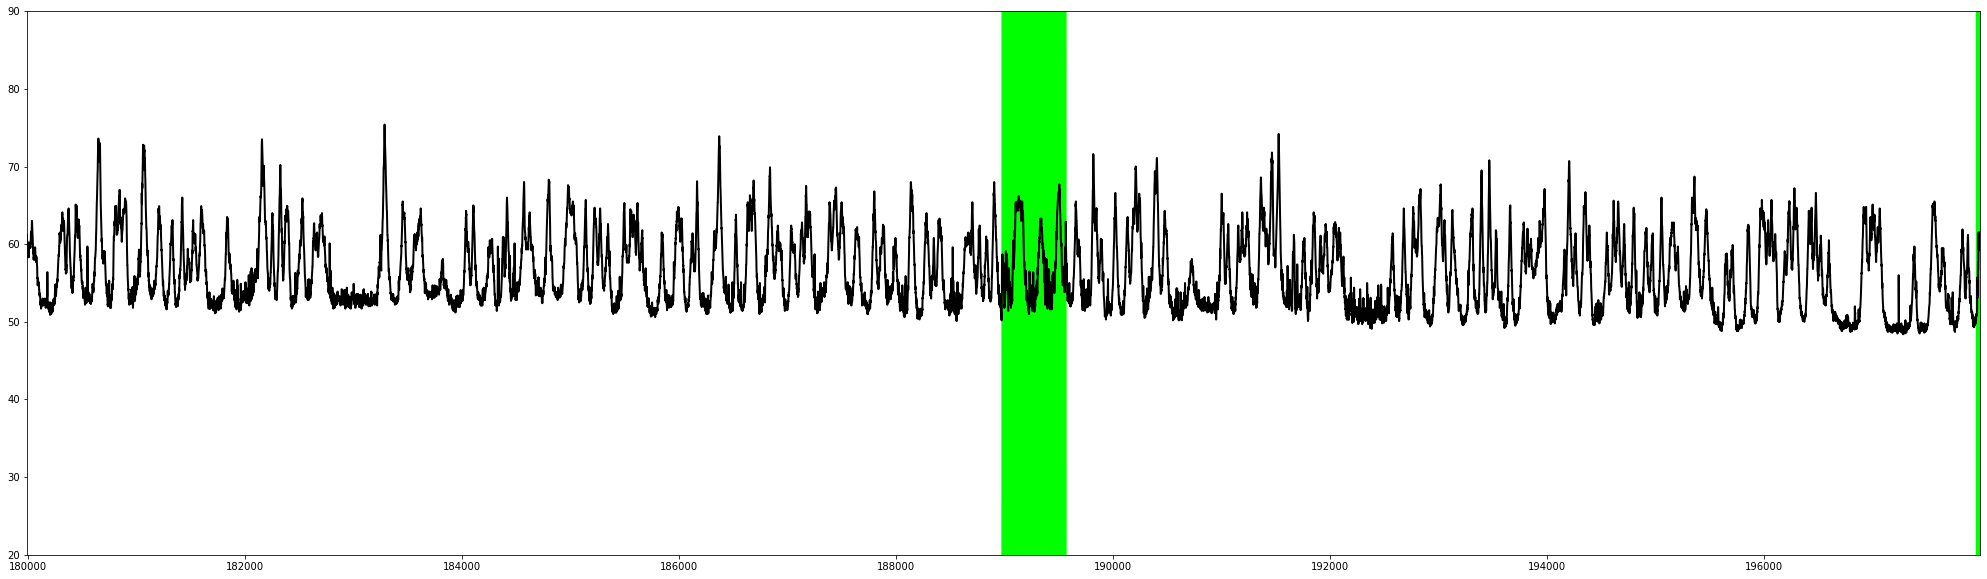

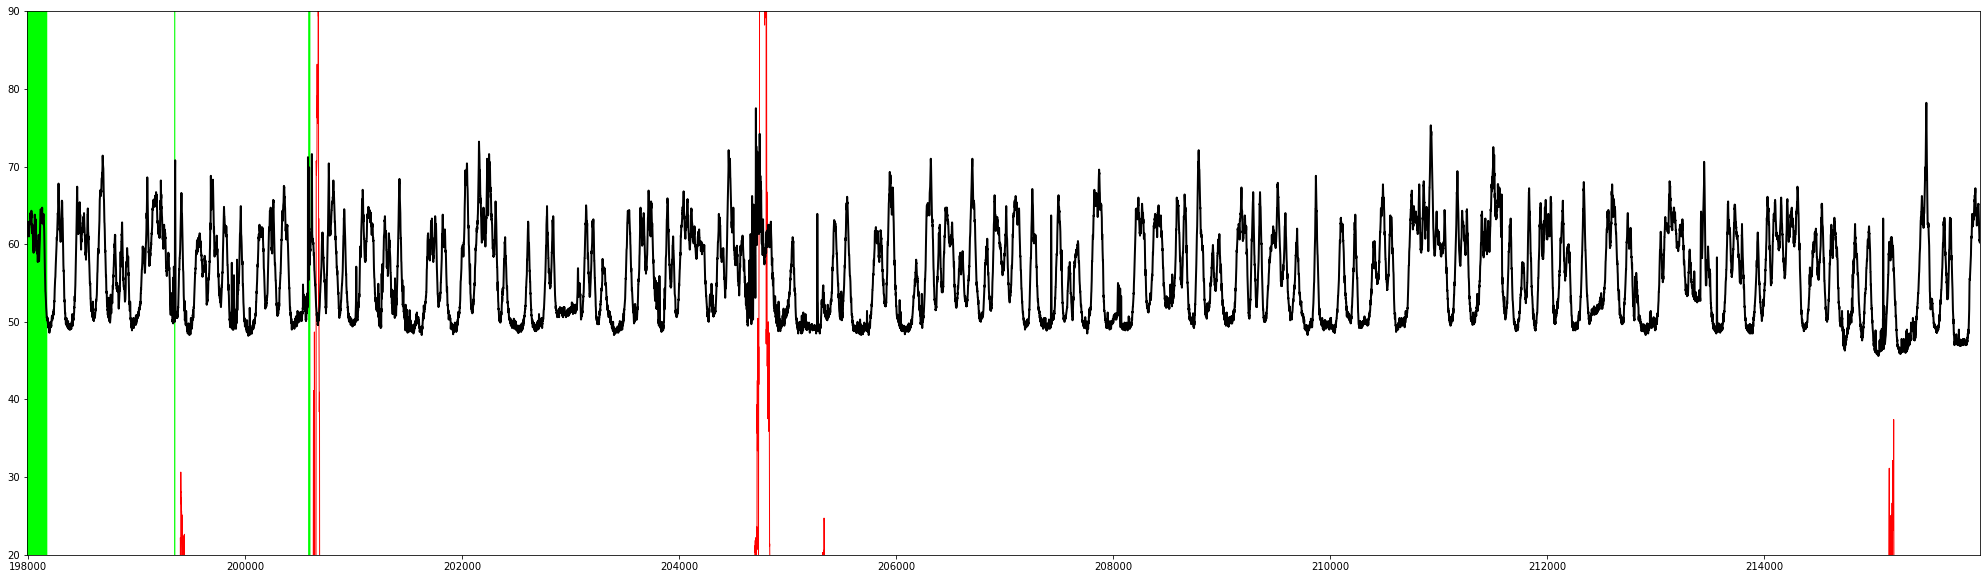

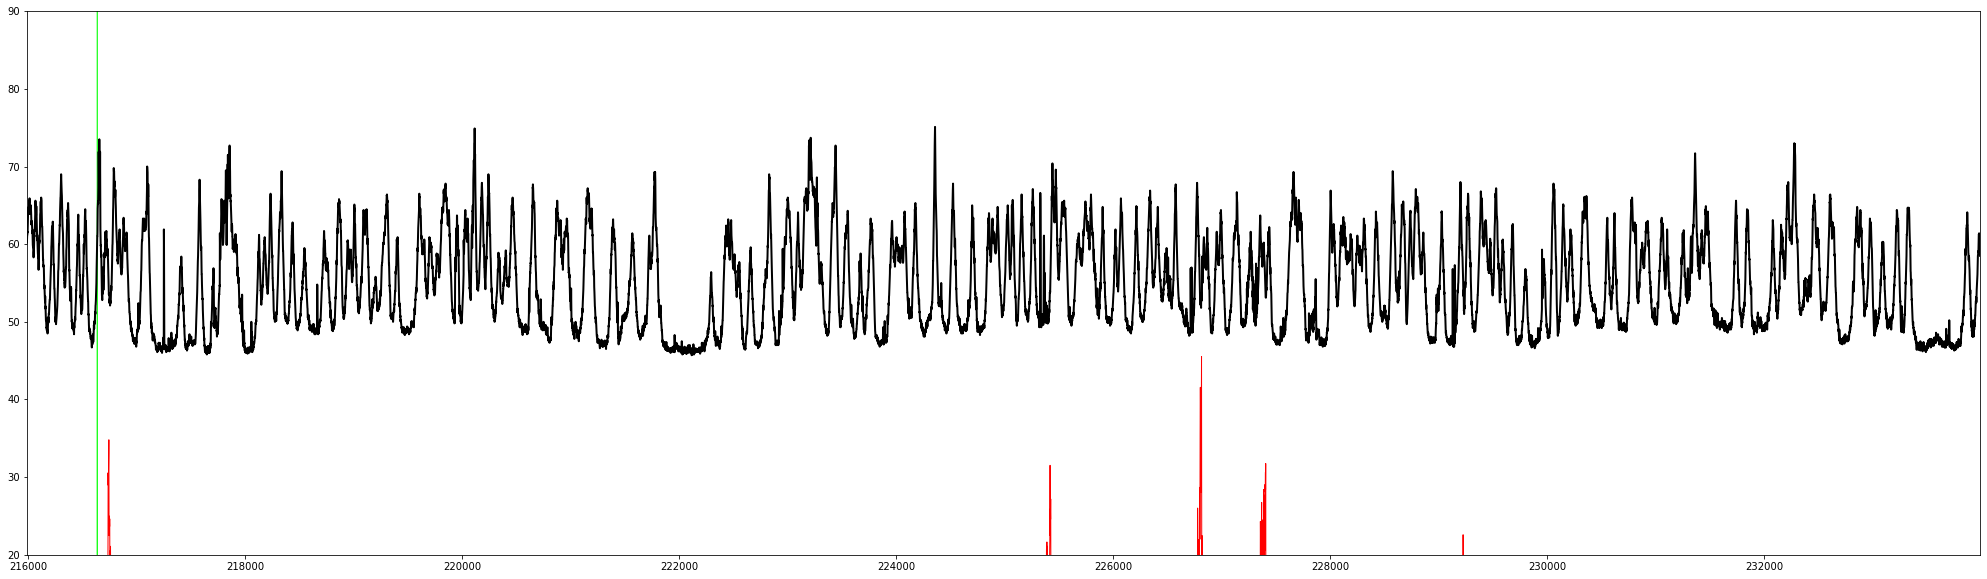

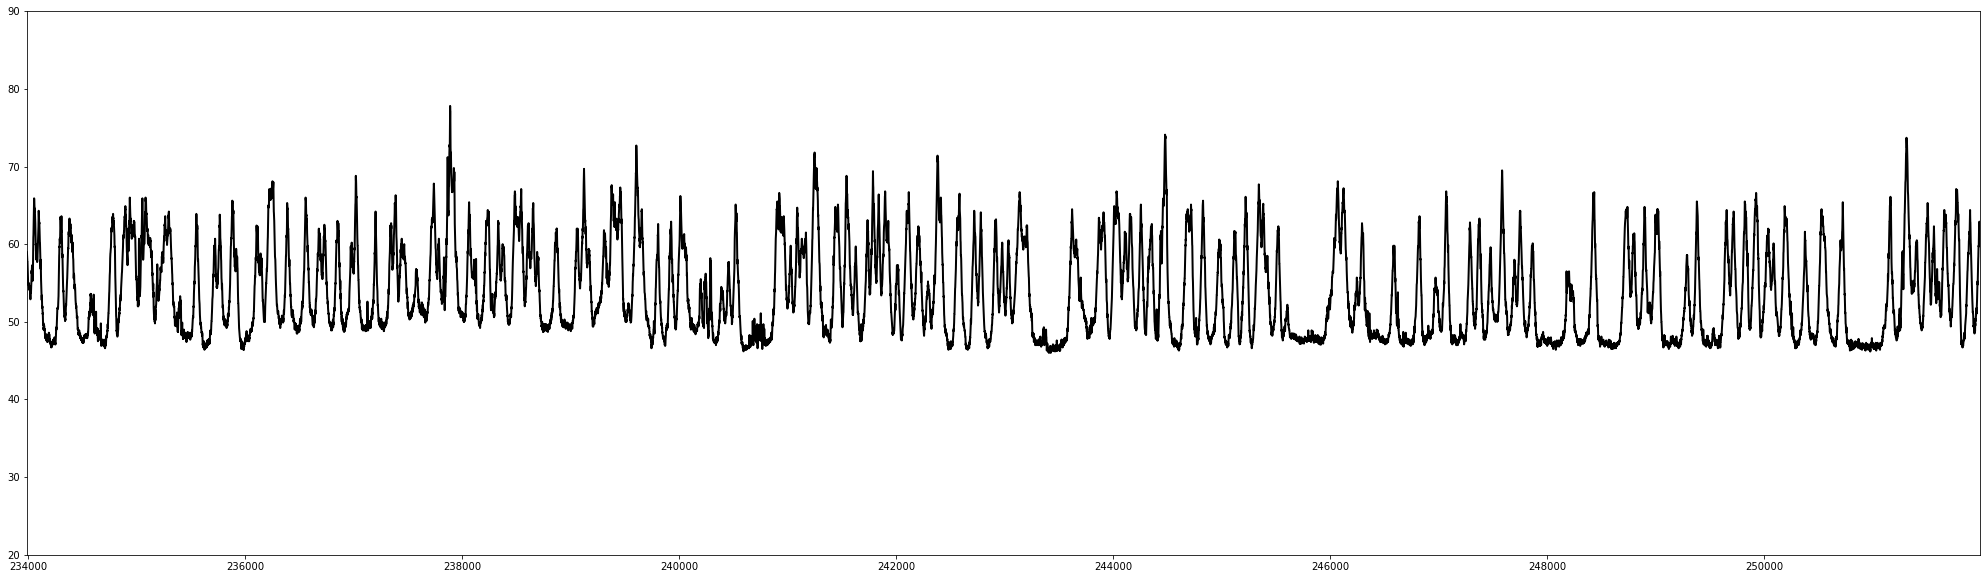

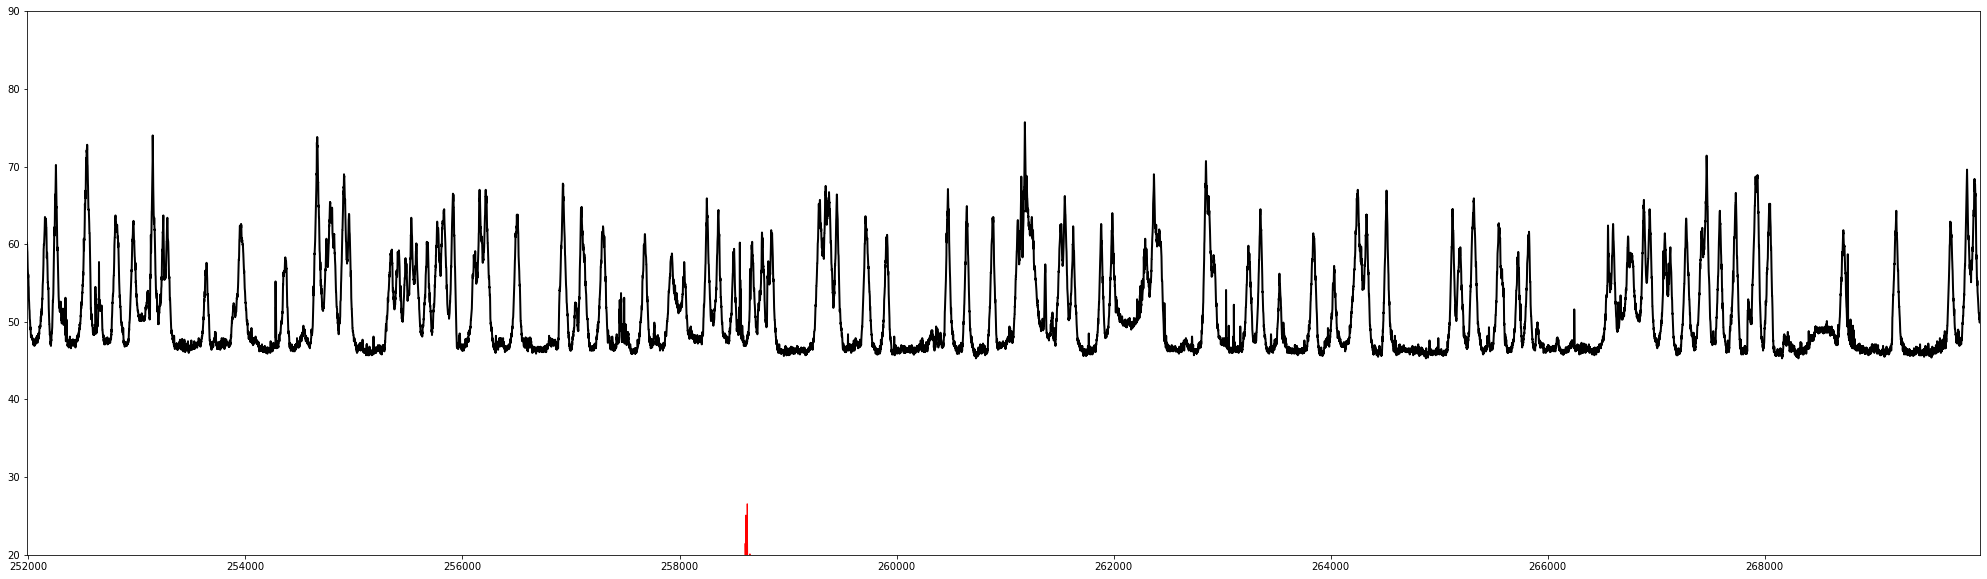

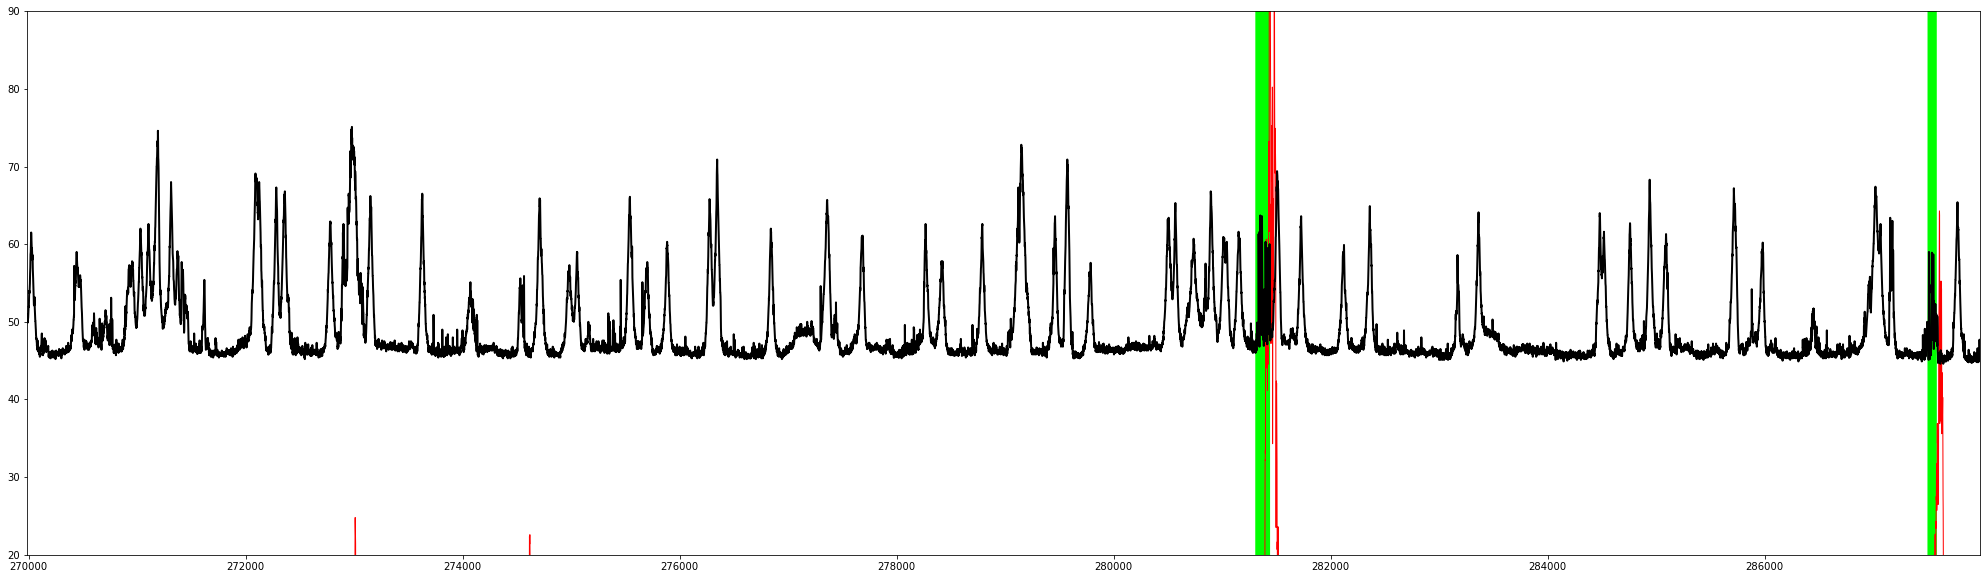

In [15]:
for i in range(16):
    fig = plt.figure(figsize=(35,10))
    ax1 = fig.add_subplot(111)
    ax1.plot(d*1000+0, '-r',linewidth = 1 )
    ax1.plot(test_for_plot, '-k',linewidth = 2)
    ax1.fill_between(label_index, label, facecolor='lime' )
    plt.xlim(i*17999,17999*(i+1))
    plt.ylim(20, 90)
    plt.show()